# Olympic Tokyo 2021 EDA

In [1]:
import numpy as np 
import pandas as pd

In [2]:
athlete = pd.read_excel('/Users/claireyuen/Desktop/2021 Olympics/Athletes.xlsx')
gender = pd.read_excel('/Users/claireyuen/Desktop/2021 Olympics/EntriesGender.xlsx')
team = pd.read_excel('/Users/claireyuen/Desktop/2021 Olympics/Teams.xlsx')
coach = pd.read_excel('/Users/claireyuen/Desktop/2021 Olympics/Coaches.xlsx')
medal = pd.read_excel('/Users/claireyuen/Desktop/2021 Olympics/Medals.xlsx')

/Users/claireyuen/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## Data Cleaning

In [3]:
athlete = athlete.drop_duplicates().reset_index(drop=True)
coach = coach.drop_duplicates().reset_index(drop=True)
coach= coach.drop(columns=['Event'], axis=1)

In [4]:
gender['check'] = (gender['Female'] + gender['Male']) - gender['Total']
print(gender['check'].sum())
gender = gender.drop(columns=['check'])

0


In [ ]:
medal['check'] = (medal['Gold'] + medal['Silver'] + medal['Bronze']) - medal['Total']
print(medal['check'].sum())
medal = medal.drop(columns=['check'])

## Data Visualization

In [47]:
import seaborn as sb
import matplotlib.pyplot as plt

### Countries Winning Medal

In [11]:
medal.drop('Rank by Total', inplace=True, axis=1)
medal.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total
0,1,United States of America,39,41,33,113
1,2,People's Republic of China,38,32,18,88
2,3,Japan,27,14,17,58
3,4,Great Britain,22,21,22,65
4,5,ROC,20,28,23,71


In [12]:
medal.sort_values('Total',ascending=False).head(10)

,Rank,Team/NOC,Gold,Silver,Bronze,Total
0,1,United States of America,39,41,33,113
1,2,People's Republic of China,38,32,18,88
4,5,ROC,20,28,23,71
3,4,Great Britain,22,21,22,65
2,3,Japan,27,14,17,58
5,6,Australia,17,7,22,46
9,10,Italy,10,10,20,40
8,9,Germany,10,11,16,37
6,7,Netherlands,10,12,14,36
7,8,France,10,12,11,33


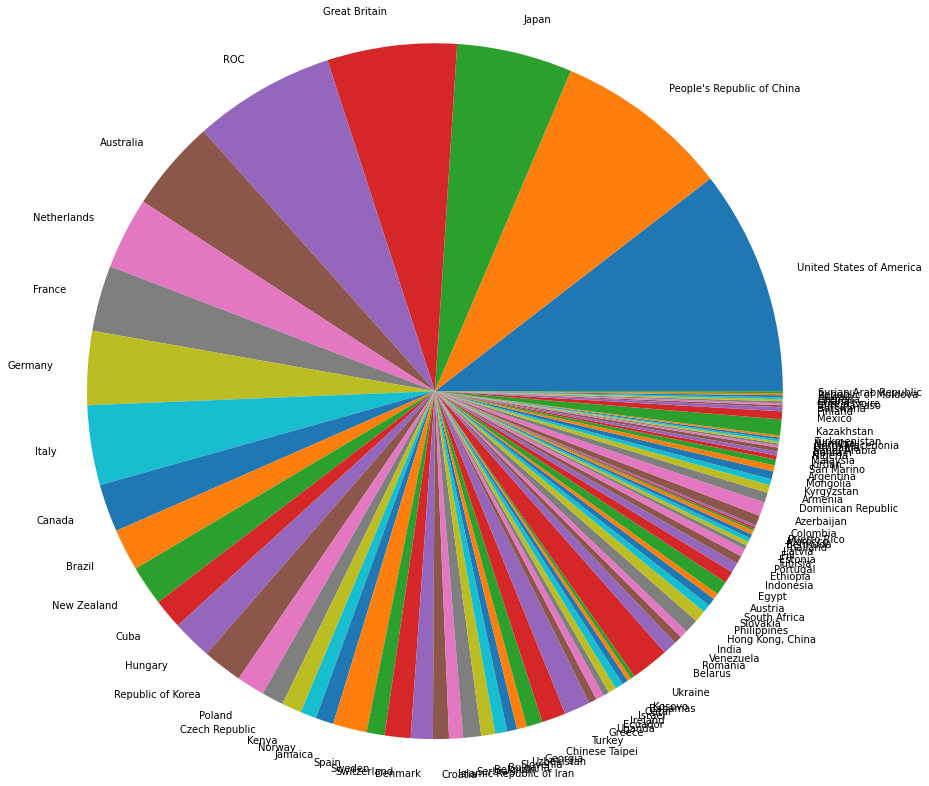

In [14]:
plt.pie(medal['Total'],labels = medal['Team/NOC'], autopct=None, radius = 4)
plt.show()

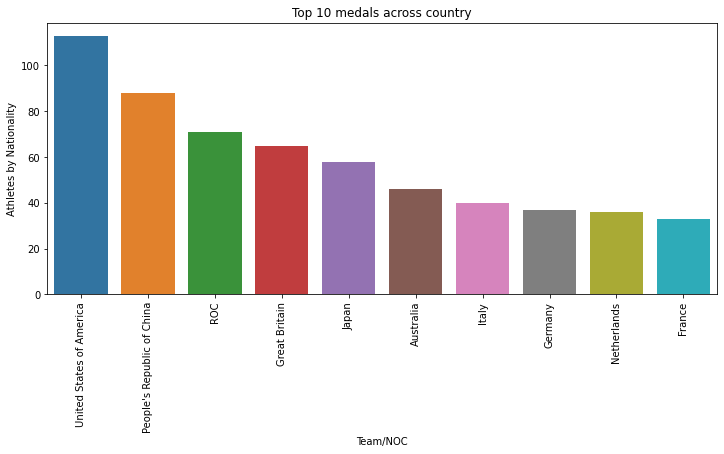

In [29]:
plt.figure(figsize=(12,5))
ax = sb.barplot(x='Team/NOC',
                 y='Total',
                 data= medal.sort_values(by='Total', ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Top 10 medals across country')
plt.ylabel('Athletes by Nationality')
plt.show()

### Athletes

In [30]:
athlete.head(10)

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
5,ABALO Luc,France,Handball
6,ABAROA Cesar,Chile,Rowing
7,ABASS Abobakr,Sudan,Swimming
8,ABBASALI Hamideh,Islamic Republic of Iran,Karate
9,ABBASOV Islam,Azerbaijan,Wrestling


/Users/claireyuen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


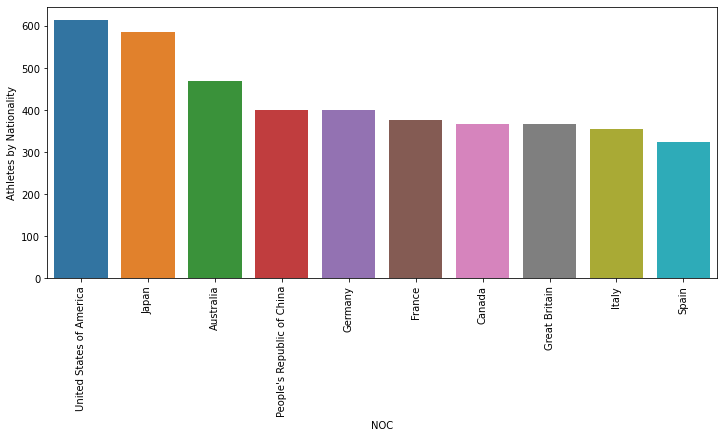

In [32]:
plt.figure(figsize=(12,5))
ax = sb.countplot('NOC',
                   data = athlete,
                   order=athlete.NOC.value_counts(ascending=False).iloc[:10].index)
plt.xticks(rotation=90)
plt.ylabel('Athletes by Nationality')
plt.show()

/Users/claireyuen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


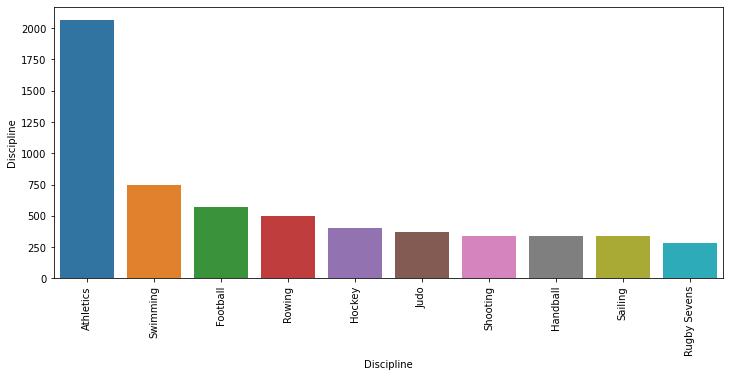

In [34]:
plt.figure(figsize=(12,5))
ax = sb.countplot('Discipline',
                   data = athlete,
                   order=athlete.Discipline.value_counts(ascending=False).iloc[:10].index)
plt.xticks(rotation=90)
plt.ylabel('Discipline')
plt.show()

### Gender Balance

In [35]:
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


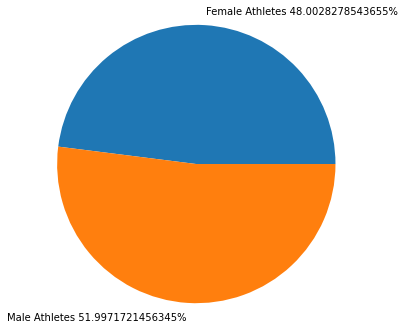

In [36]:
m,f = 0,0
for x in range(len(gender['Discipline'])):
    f+=gender['Female'][x]
    m+=gender['Male'][x]
flbl = 'Female Athletes '+ str(f*100/(f+m))+'%'
mlbl = 'Male Athletes '+str(m*100/(f+m))+'%'
plt.pie([f,m],labels=[flbl, mlbl], radius=1.6)
plt.show()

In [37]:
#Top games with female participation
gender.sort_values('Female', ascending=False).head()

,Discipline,Female,Male,Total
4,Athletics,969,1072,2041
36,Swimming,361,418,779
20,Football,264,344,608
29,Rowing,257,265,522
24,Judo,192,201,393


In [38]:
#Top games with male participation
gender.sort_values('Male', ascending=False).head()

,Discipline,Female,Male,Total
4,Athletics,969,1072,2041
36,Swimming,361,418,779
20,Football,264,344,608
29,Rowing,257,265,522
24,Judo,192,201,393


In [39]:
#Top games that female's participation is higher than male
gender[gender['Female']>gender['Male']]

,Discipline,Female,Male,Total
3,Artistic Swimming,105,0,105
12,Cycling BMX Freestyle,10,9,19
17,Diving,72,71,143
28,Rhythmic Gymnastics,96,0,96


### Analysing Data on  Coach

In [45]:
coach.head()

,Name,NOC,Discipline
0,ABDELMAGID Wael,Egypt,Football
1,ABE Junya,Japan,Volleyball
2,ABE Katsuhiko,Japan,Basketball
3,ADAMA Cherif,Côte d'Ivoire,Football
4,AGEBA Yuya,Japan,Volleyball


In [43]:
print('Total disciplines: ' + str(len(athlete.groupby(by='Discipline')['NOC'].count())))
coach.groupby(by='Discipline', as_index=False)['Name'].count()

Total disciplines: 46


,Discipline,Name
0,Artistic Swimming,69
1,Baseball/Softball,25
2,Basketball,74
3,Football,59
4,Handball,29
5,Hockey,45
6,Rugby Sevens,25
7,Volleyball,45
8,Water Polo,22


In [ ]:
#There are only 9 disciplines with coach. 

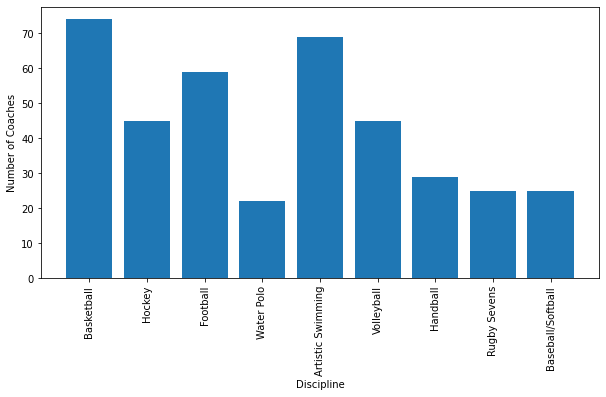

In [46]:
l=[]
for i in list(set(coach['Discipline'])):
    l.append(list(coach['Discipline']).count(i))
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(list(set(coach['Discipline'])),l)
plt.xlabel('Discipline')
plt.ylabel('Number of Coaches')
plt.xticks(rotation=90)
plt.show()

In [48]:
#P(A)
PA=medal[medal['Silver']>0]['Silver'].count()/medal['Silver'].sum()
#P(A,B)
PAB=medal[(medal['Silver']>0) & (medal['Gold']>0)]['Gold'].count()\
    /medal[(medal['Silver']>0) & (medal['Gold']>0)]['Gold'].sum()
#P(B|A) = PAB/PA
PBA = PAB/PA
print('The probability of winning a gold medal after winning at least one silver is: ' + str(round(PBA,2)*100) +'%')

The probability of winning a gold medal after winning at least one silver is: 80.0%
